# [실습] 이변량분석 종합실습

## 0.환경준비

In [11]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# 숫자형 Y

## 보스톤 집값 데이터

![](https://ichi.pro/assets/images/max/724/0*3r3cqJ3Q875mQXVV)

|	변수	|	설명	|
|	----	|	----	|
|	medv	|	타운별 집값(중위수)	|
|	crim	|	범죄율	|
|	zn2	|	25,000 평방피트를 초과 거주지역 비율 (범주: 0-하, 1-중, 2-상)	|
|	indus	|	비소매상업지역 면적 비율	|
|	chas	|	찰스강변 위치(범주 : 강변1, 아니면 0)	|
|	nox	|	일산화질소 농도	|
|	rm	|	주택당 방 수	|
|	age	|	1940년 이전에 건축된 주택의 비율	|
|	dis	|	직업센터의 거리	|
|	rad	|	방사형 고속도로까지의 거리	|
|	tax	|	재산세율	|
|	ptratio	|	학생/교사 비율	|
|	black	|	인구 중 흑인 비율	|
|	lstat	|	인구 중 하위 계층 비율	|


In [12]:
boston = pd.read_csv('https://bit.ly/3EuWvZw')
boston.head()

,crim,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,zn2
0,0.00632,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,1
1,0.02731,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0
3,0.03237,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,0
4,0.06905,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,0


### (1) 숫자형 X --> 숫자형 Y

* 시각화 : scatter, jointplot  
* 수치화 : 상관분석  
* 관계 평가

#### ① crim(범죄율) --> medv(집값)

1) 시각화 : scatter, jointplot 

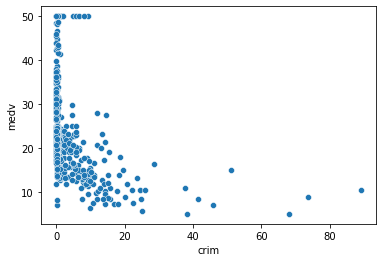

In [3]:
sns.scatterplot(data=boston, x='crim', y='medv')
plt.show()

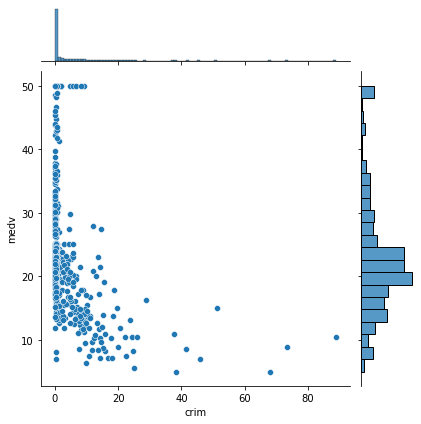

In [4]:
sns.jointplot(data=boston, x='crim', y='medv')
plt.show()

2) 수치화 : 상관분석

In [5]:
import scipy.stats as spst

In [6]:
result = spst.pearsonr(boston['crim'], boston['medv'])
print('상관계수:', result[0])
print('p-value:', result[1])

상관계수: -0.3883046085868116
p-value: 1.1739870821941207e-19


3) 관계 평가하기

> - jointplot.으로 확인해본 결과는 아래와 같다.
>    1. 대부분의 범죄율(crim)은 0 근처에 데이터가 몰려있다.
>    2. medv는 대부분 20근처에 존재하지만 일부 데이터가 50이상으로 규정되어있다.
> - 상관계수는 -0.388 이므로 약하지만 상관관계가 존재한다는 것을 알 수 있다.
> - p-value는 e-19이므로 귀무가설을 참이라 할 때, 틀릴 확률이 매우 낮다는 것을 알 수 있다.

4) 추가 분석할 내용 정리

>  crim에 대한 boxplot을 진행하여 데이터가 어디에 몰려있는지, 이상치는 무엇이 존재하는지 확인해볼것이다.  
>  범죄율이 특히 높은 지역은 왜 높은지에 대해서 추가적인 조사가 필요할 것 같다.

#### ② ptratio(교사학생 비율) --> medv(집값)

1) 시각화 : scatter, jointplot 

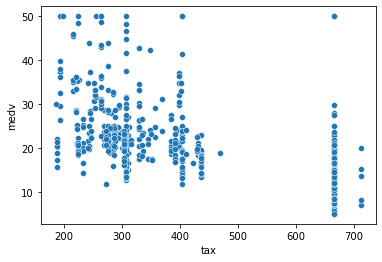

In [7]:
sns.scatterplot(data=boston, x='tax', y='medv')
plt.show()

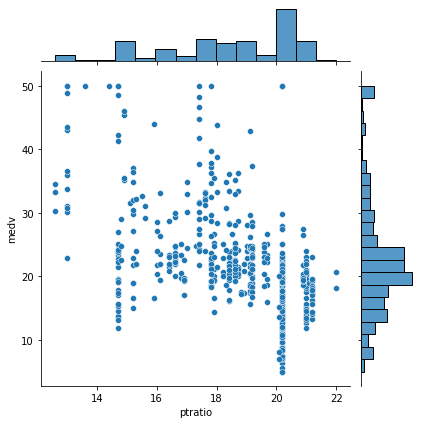

In [8]:
sns.jointplot(data=boston, x='ptratio', y='medv')
plt.show()

2) 수치화 : 상관분석

In [9]:
result = spst.pearsonr(boston['tax'], boston['medv'])
print('상관계수:', result[0])
print('p-value:', result[1])

상관계수: -0.4685359335677671
p-value: 5.637733627689083e-29


3) 관계 평가하기

> - 교사학생 비율과 집값의 상관관계는 그래프를 보아 약하지만 선의 형태를 보인다.
> - 상관계수는 -0.508 이므로 상관관계가 존재한다는 것을 알 수 있다.
> - p-value는 e-34이므로 귀무가설을 참이라 할 때, 틀릴 확률이 매우 낮다는 것을 알 수 있다

4) 추가 분석할 내용 정리

> - 교사학생 비율이 높은 지역은 인프라가 잘 되어있는지 추가적인 조사가 필요하다.

#### ③ lstat(하위계층 비율) --> medv(집값)

1) 시각화 : scatter, jointplot 

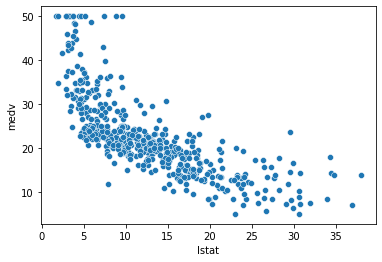

In [33]:
sns.scatterplot(data=boston, x='lstat', y='medv')
plt.show()

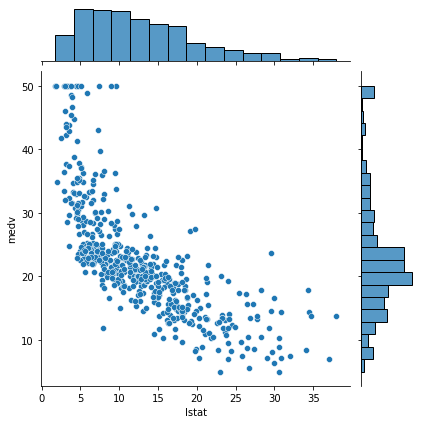

In [34]:
sns.jointplot(data=boston, x='lstat', y='medv')
plt.show()

2) 수치화 : 상관분석

In [35]:
result = spst.pearsonr(boston['lstat'], boston['medv'])
print('상관계수:', result[0])
print('p-value:', result[1])

상관계수: -0.7376627261740148
p-value: 5.08110339438697e-88


3) 관계 평가하기

> - 저소득층 비율과 집값의 상관관계는 그래프를 보아 뚜렷한 선의 형태를 보인다.
> - 상관계수는 -0.738 이므로 상관관계가 강하게 존재한다는 것을 알 수 있다.
> - p-value는 e-88이므로 귀무가설을 참이라 할 때, 틀릴 확률이 매우 낮다는 것을 알 수 있다

4) 추가 분석할 내용 정리

> - 저소득층이 많은 비율에서는 어떠한 형태의 집이 많은지 파악할 필요가 있다.

#### ④ nox(일산화탄소 농도) --> medv(집값)

1) 시각화 : scatter, jointplot 

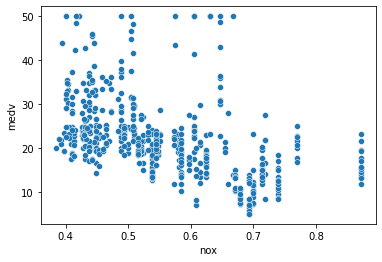

In [36]:
sns.scatterplot(data=boston, x='nox', y='medv')
plt.show()

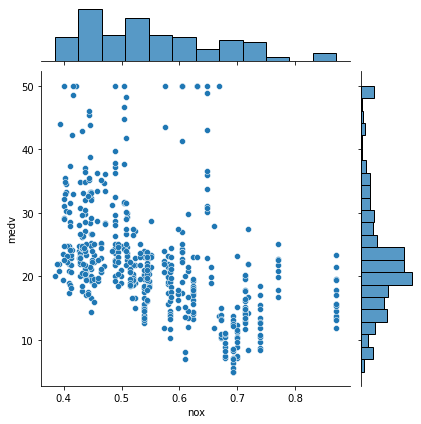

In [37]:
sns.jointplot(data=boston, x='nox', y='medv')
plt.show()

2) 수치화 : 상관분석

In [38]:
result = spst.pearsonr(boston['nox'], boston['medv'])
print('상관계수:', result[0])
print('p-value:', result[1])

상관계수: -0.4273207723732826
p-value: 7.065041586251507e-24


3) 관계 평가하기

> - 일산화탄소 비율과 집값의 상관관계는 그래프를 보아 어느정도 선의 형태를 보인다.
> - 상관계수는 -0.4273207723732826 이므로 상관관계가 어느정도 존재한다는 것을 알 수 있다.
> - p-value는 7.065041586251507e-24이므로 귀무가설을 참이라 할 때, 틀릴 확률이 매우 낮다는 것을 알 수 있다

4) 추가 분석할 내용 정리

> 일산화탄소가 높은 지역의 집구조와 낮은지역의 집구조를 알아보자

### (2) 범주형 X --> 숫자형 Y

* 시각화 : 평균비교 barplot
* 수치화 : t-test, anova
* 관계 평가

#### ① chas(찰스강변) --> medv(집값)

1) 시각화 : 평균비교 barplot

<AxesSubplot:xlabel='chas', ylabel='medv'>

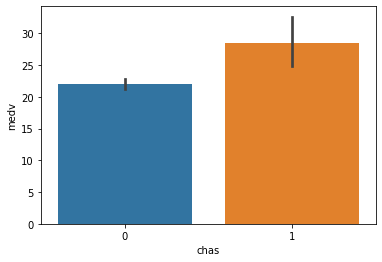

In [16]:
sns.barplot(data=boston, x='chas', y='medv')

In [18]:
boston.loc[boston['chas'] == 0]['medv'].mean()

22.093842887473482

2) 수치화 : t-test

In [43]:
river_yes = boston.loc[boston['chas']==1, 'medv'] 
river_no = boston.loc[boston['chas']==0, 'medv'] 
spst.ttest_ind(river_yes, river_no)

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

3) 관계 평가하기

> p-value가 0.05이하이므로 chas와 medv는 관계가 있다.

4) 추가 분석할 내용 정리

#### ① zn2(대저택 비율 범주, 0,1,2) --> medv(집값)

1) 시각화 : 평균비교 barplot

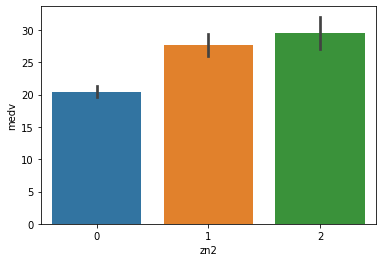

In [44]:
sns.barplot(data=boston, x='zn2', y='medv')
plt.show()

2) 수치화 : anova

In [46]:
p1 = boston.loc[boston['zn2']==0, 'medv']
p2 = boston.loc[boston['zn2']==1, 'medv']
p3 = boston.loc[boston['zn2']==2, 'medv']

In [47]:
spst.f_oneway(p1, p2, p3)

F_onewayResult(statistic=41.56175654117286, pvalue=1.9727794047741185e-17)

3) 관계 평가하기

> p_value의 값이 0.05 이하이기 때문에 [대저택비율과 집값은 상관관계가 존재한다]의 가설은 참일 가능성이 높다.

4) 추가 분석할 내용 정리

### (3) 관계 정리하기

① 강한관계

하위계층에 따른 집값  
교사 학생 비율

② 중간관계

일산화탄소 비율  
범죄율

③ 관계없음

# 범주형 Y

## 타이타닉 탑승객 데이터 : 기본

![](https://images0.persgroep.net/rcs/0XaEsm6zKVcBbpINLInGGmU2F8w/diocontent/22495473/_crop/2/111/1997/1128/_fitwidth/763?appId=93a17a8fd81db0de025c8abd1cca1279&quality=0.8)

|	변수	|	설명	|	값 설명	|
|	----	|	----	|	----	|
|	survived	|	생존여부	|	0 - 사망, 1- 생존	|
|	Pclass	|	Ticket class	|	1 = 1st, 2 = 2nd, 3 = 3rd	|
|	Sex	|	성별	|		|
|	Age	|	Age in years	|		|
|	Sibsp	|	# of siblings / spouses aboard the Titanic	|		|
|	Parch	|	# of parents / children aboard the Titanic	|		|
|	Ticket	|	Ticket number	|		|
|	Fare	|	Passenger fare	|		|
|	Cabin	|	Cabin number	|		|
|	Embarked	|	Port of Embarkation	|	C = Cherbourg, Q = Queenstown, S = Southampton	|


In [13]:
titanic = pd.read_csv('https://bit.ly/3FsgwkJ')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### (1) 숫자형 X --> 범주형 Y

* 그래프 : histogram, densityplot
* 수치화 : 로지스틱회귀  
* 관계 평가

#### ① Age --> Survived

1) 그래프 : histogram, densityplot

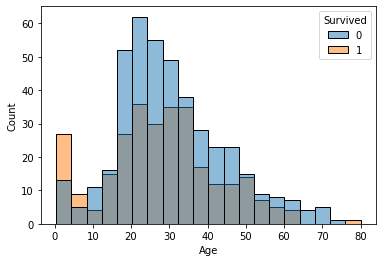

In [14]:
sns.histplot(data = titanic, x='Age', hue='Survived')
plt.show()

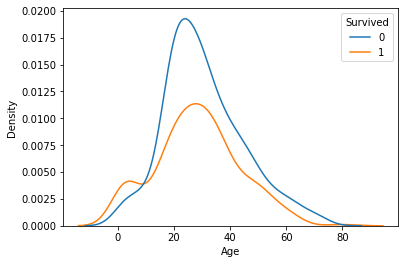

In [15]:
sns.kdeplot(data = titanic, x='Age', hue='Survived')
plt.show()

2) 수치화 : 로지스틱회귀

In [21]:
import statsmodels.api as sm

tmp = titanic.loc[titanic['Age'].notnull()]
model = sm.Logit(tmp['Survived'], tmp['Age'])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.672504
         Iterations 4
Age    9.909841e-08
dtype: float64


3) 관계 평가하기

> 타이타닉에서의 나이와 생존율은 상관관계가 존재한다.  
> p-value가 0.05보다 작고, kdeplot상 겹치는 부분이 많이 존재하지않는다.

4) 추가 분석할 내용 정리

#### ② Fare --> Survived

1) 그래프 : histogram, densityplot

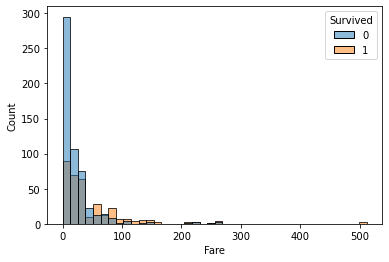

In [22]:
sns.histplot(data=titanic, x='Fare', hue='Survived', bins=40)
plt.show()

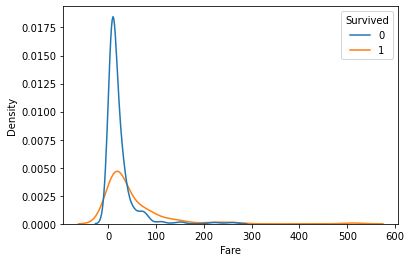

In [23]:
sns.kdeplot(data=titanic, x='Fare', hue='Survived')
plt.show()

2) 수치화 : 로지스틱회귀

In [24]:
titanic[['Fare', 'Survived']].isnull().sum()

Fare        0
Survived    0
dtype: int64

In [25]:
model = sm.Logit(titanic['Survived'], titanic['Fare'])
result = model.fit()
print(result.pvalues)


Optimization terminated successfully.
         Current function value: 0.689550
         Iterations 4
Fare    0.014925
dtype: float64


3) 관계 평가하기

> 0.05 이하의 p-value가 나왔으므로 Fare에 따른 Survived는 관계가있다.

4) 추가 분석할 내용 정리

### (2) 범주형 X --> 범주형 Y

* 교차표(pd.crosstab())
* 시각화( Stacked Bar, Mosaic)
* 가설검정(카이제곱검정)
* 관계 평가

#### ① Sex --> Survived

1) 교차표(pd.crosstab())

In [64]:
pd.crosstab(titanic['Sex'], titanic['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


In [68]:
pd.crosstab(titanic['Sex'], titanic['Survived'], normalize='index')

Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


2) 시각화( Stacked Bar, Mosaic)

In [69]:
table = pd.crosstab(titanic['Sex'], titanic['Survived'], normalize='index')

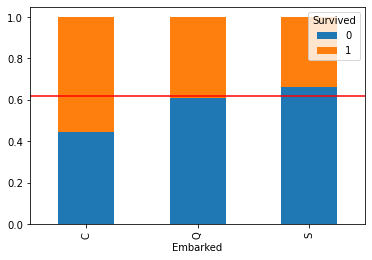

In [85]:
table.plot.bar(stacked=True)
plt.axhline(1-titanic['Survived'].mean(), color = 'r')
plt.show()

In [87]:
mosaic(titanic, [ 'Embarked','Survived'])

plt.axhline(1- titanic['Embarked'].mean(), color = 'r')
plt.show()

NameError: name 'mosaic' is not defined

3) 가설검정(카이제곱검정)

In [72]:
table = pd.crosstab(titanic['Sex'], titanic['Survived'])

result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n',result[3])

카이제곱통계량 260.71702016732104
p-value 1.1973570627755645e-58
기대빈도
 [[193.47474747 120.52525253]
 [355.52525253 221.47474747]]


4) 관계 평가하기

> 카이제곱검정을 확인해본 결과, p-value가 e-58이므로 성별에 따른 생존율은 상관관계가 있다.   
> crosstab을 확인해본 결과, 남자의 경우 사망, 여성의 경우 생존할 확률이 높다.

5) 추가 분석하기

#### ② Pclass --> Survived

1) 교차표(pd.crosstab())

In [73]:
pd.crosstab(titanic['Pclass'], titanic['Survived'])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [75]:
pd.crosstab(titanic['Pclass'], titanic['Survived'], normalize='columns')

Survived,0,1
Pclass,,
1,0.145719,0.397661
2,0.176685,0.254386
3,0.677596,0.347953


2) 시각화( Stacked Bar, Mosaic)

In [76]:
table = pd.crosstab(titanic['Pclass'], titanic['Survived'], normalize='index')

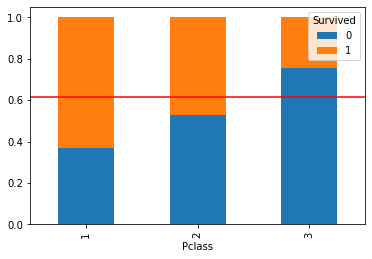

In [77]:
table.plot.bar(stacked=True)
plt.axhline(1-titanic['Survived'].mean(), color = 'r')
plt.show()

3) 가설검정(카이제곱검정)

In [78]:
table = pd.crosstab(titanic['Pclass'], titanic['Survived'])

result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n',result[3])

카이제곱통계량 102.88898875696056
p-value 4.549251711298793e-23
기대빈도
 [[133.09090909  82.90909091]
 [113.37373737  70.62626263]
 [302.53535354 188.46464646]]


4) 관계 평가하기

> pclass에 따른 사망률은 p-value가 0.05이하이므로 상관관계가 있어 보인다.

5) 추가 분석하기

#### ③ Embarked --> Survived

1) 교차표(pd.crosstab())

In [81]:
pd.crosstab(titanic['Embarked'], titanic['Survived'])

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,217


In [30]:
pd.crosstab(titanic['Embarked'], titanic['Survived'], normalize='columns')

Survived,0,1
Embarked,,
C,0.136612,0.273529
Q,0.085610,0.088235
S,0.777778,0.638235


2) 시각화( Stacked Bar, Mosaic)

In [82]:
table = pd.crosstab(titanic['Embarked'], titanic['Survived'], normalize='index')

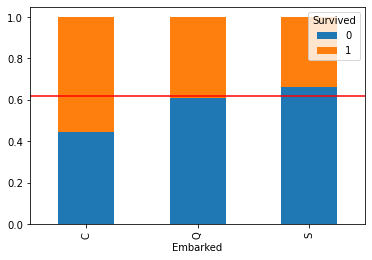

In [84]:
table.plot.bar(stacked=True)
plt.axhline(1-titanic['Survived'].mean(), color = 'r')
plt.show()

3) 가설검정(카이제곱검정)

In [79]:
table = pd.crosstab(titanic['Embarked'], titanic['Survived'])

result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n',result[3])

카이제곱통계량 26.48914983923762
p-value 1.769922284120912e-06
기대빈도
 [[103.7480315  64.2519685]
 [ 47.5511811  29.4488189]
 [397.7007874 246.2992126]]


4) 관계 평가하기

> 카이제곱검정을 확인해본 결과, p-value가 e-06이므로 탑승 지역에 따른 생존율은 관계가 있다.  
> crosstab을 확인해본 결과, 사망자와 생존자의 대다수는 사우스햄튼에서 탔다.

5) 추가 분석하기

### (3) 관계 정리하기

① 강한관계

나이, 지불비용

② 중간관계

지역, 등급

③ 관계없음

## 신용도 분석 데이터 : 심화


![](https://storage.googleapis.com/kaggle-datasets-images/310/684/3503c6c827ca269cc00ffa66f2a9c207/dataset-cover.jpg)

|	칼럼명	|	설명	|	값 설명	|
|	----	|	----	|	----	|
|	Creditability	|	신용도	|	0 : 나쁜 신용도, 1 : 좋은 신용도|
|	AccountBalance	|	은행잔고	|	1: No account, 2 : None (No balance), 3 : Some Balance	|
|	Employment	|	현 직업 근무 기간	|	1: Unemployed, 2: <1 Year, 3: [1, 4), 4: [4, 7), 5: Above 7|
|	SexMarital	|	성별 & 결혼상태	|	1: Male, Divorced, 2: Male, Single , 3: Male, Married/Widowed , 4: Female	|
|	CurrentAddress	|	현 거주지 거주기간	|1: <1 Year , 2: [1, 4) , 3: [4, 7) , 4: Above 7	|
|CreditDuration	|신청한 대출기간(월)|	숫자|
|CreditAmount |	신청한 대출금액	||
|Age|	나이||

In [88]:
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/credit_NA.csv"
usecols = ['Creditability','AccountBalance','Employment','SexMarital','CurrentAddress','CreditDuration','CreditAmount', 'Age']
credit = pd.read_csv(path, usecols=usecols)
credit.head()

,Creditability,AccountBalance,CreditDuration,CreditAmount,Employment,SexMarital,CurrentAddress,Age
0,1,3,24,1249,2,4,2,28.0
1,1,2,9,276,3,4,4,22.0
2,1,1,18,1049,2,2,4,21.0
3,1,1,24,6419,5,2,4,NaN
4,1,3,12,1424,5,2,4,55.0


### (1) 숫자형 X --> 범주형 Y

* 그래프 : histogram, densityplot
* 수치화 : 로지스틱회귀  
* 관계 평가

#### ① Age --> Creditability

1) 그래프 : histogram, densityplot

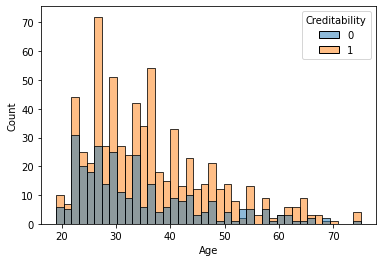

In [89]:
sns.histplot(data = credit, x='Age', hue = 'Creditability', bins = 40)
plt.show()

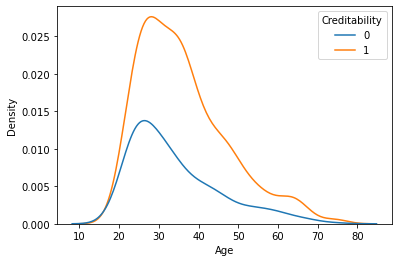

In [90]:
sns.kdeplot(data=credit, x='Age', hue='Creditability')
plt.show()

2) 수치화 : 로지스틱회귀

In [123]:
#credit1 = credit.copy()
credit1.dropna(axis=0,subset=['Age'],inplace=True)
credit1['Age'].isnull().sum()

0

In [124]:
import statsmodels.api as sm

model = sm.Logit(credit1['Creditability'], credit1['Age'])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.609024
         Iterations 5
Age    1.333286e-33
dtype: float64


3) 관계 평가하기

* Age와 신용의 정도를 로지스틱 분석해본 결과 p-value의 값이 e-33이므로 상관관계가 존재한다.(중간)

4) 추가 분석할 내용 정리

#### ② CreditDuration --> Creditability

1) 그래프 : histogram, densityplot

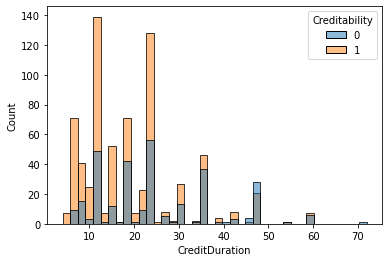

In [125]:
sns.histplot(data=credit, x='CreditDuration', hue='Creditability', bins=40)
plt.show()

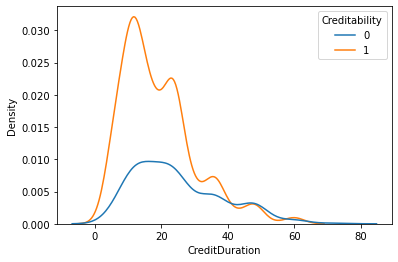

In [126]:
sns.kdeplot(data=credit, x='CreditDuration', hue='Creditability')
plt.show()

2) 수치화 : 로지스틱회귀

In [127]:
credit2 = credit.copy()
credit2[['CreditDuration', 'Creditability']].isnull().sum()

CreditDuration    0
Creditability     0
dtype: int64

In [128]:
import statsmodels.api as sm

model = sm.Logit(credit1['Creditability'], credit1['CreditDuration'])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.663513
         Iterations 4
CreditDuration    1.687533e-13
dtype: float64


3) 관계 평가하기

* 로지스틱 분석 결과, 신용정도와 대출신청기간에는 상관관계가 존재한다(약함)

4) 추가 분석할 내용 정리

#### ③ CreditAmount --> Creditability

1) 그래프 : histogram, densityplot

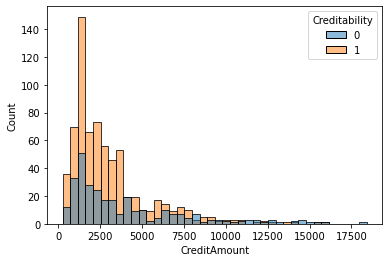

In [131]:
sns.histplot(data=credit, x='CreditAmount', hue='Creditability', bins=40)
plt.show()

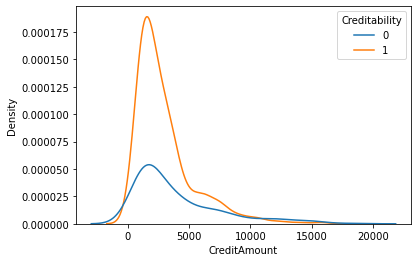

In [134]:
sns.kdeplot(data=credit, x='CreditAmount', hue='Creditability')
plt.show()

2) 수치화 : 로지스틱회귀

In [135]:
credit3 = credit.copy()
credit2[['CreditAmount', 'Creditability']].isnull().sum()

CreditAmount     0
Creditability    0
dtype: int64

In [136]:
import statsmodels.api as sm

model = sm.Logit(credit1['Creditability'], credit1['CreditAmount'])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.672006
         Iterations 4
CreditAmount    7.907642e-10
dtype: float64


3) 관계 평가하기

* 대출의 양과 신용정보는 약한 상관관계가 존재한다.

4) 추가 분석할 내용 정리

### (2) 범주형 X --> 범주형 Y

* 교차표(pd.crosstab())
* 시각화( Stacked Bar, Mosaic)
* 가설검정(카이제곱검정)
* 관계 평가

#### ① AccountBalance --> Creditability

1) 교차표(pd.crosstab())

In [139]:
pd.crosstab(credit['AccountBalance'], credit['Creditability'])

Creditability,0,1
AccountBalance,,
1,135,139
2,105,164
3,60,397


2) 시각화( Stacked Bar, Mosaic)

In [153]:
table = pd.crosstab(credit['AccountBalance'], credit['Creditability'], normalize='index')

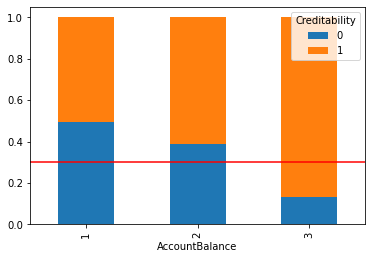

In [163]:
table.plot.bar(stacked=True)
plt.axhline(1-credit['Creditability'].mean(), color = 'r')
plt.show()

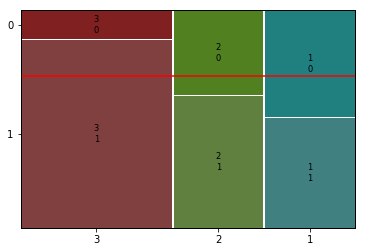

In [160]:
from statsmodels.graphics.mosaicplot import mosaic

mosaic(credit, [ 'AccountBalance','Creditability'])
plt.axhline(credit['Creditability'].mean(), color = 'r')
plt.show()

3) 가설검정(카이제곱검정)

In [147]:
table = pd.crosstab(credit['AccountBalance'], credit['Creditability'])

result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n',result[3])

카이제곱통계량 120.84376361168343
p-value 5.7426208775458905e-27
기대빈도
 [[ 82.2 191.8]
 [ 80.7 188.3]
 [137.1 319.9]]


4) 관계 평가하기

* 은행잔고의 그룹에 따라서 신용도 평가는 관련이 있다.(중간)

5) 추가 분석하기

#### ② Employment --> Creditability

1) 교차표(pd.crosstab())

In [148]:
pd.crosstab(credit['Employment'], credit['Creditability'])

Creditability,0,1
Employment,,
1,23,39
2,70,102
3,104,235
4,39,135
5,64,189


2) 시각화( Stacked Bar, Mosaic)

In [176]:
table = pd.crosstab(credit['Employment'], credit['Creditability'], normalize='index')

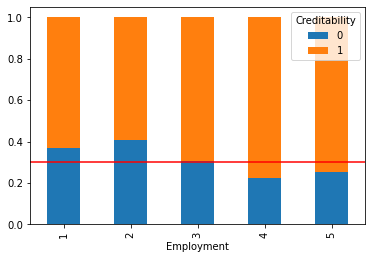

In [177]:
table.plot.bar(stacked=True)
plt.axhline(1-credit['Creditability'].mean(), color = 'r')
plt.show()

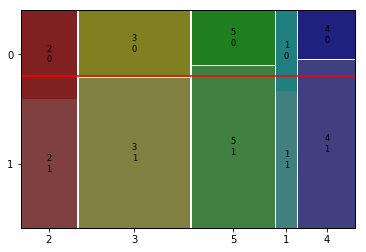

In [178]:
from statsmodels.graphics.mosaicplot import mosaic

mosaic(credit, [ 'Employment','Creditability'])
plt.axhline(credit['Creditability'].mean(), color = 'r')
plt.show()

3) 가설검정(카이제곱검정)

In [179]:
table = pd.crosstab(credit['Employment'], credit['Creditability'])

result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n',result[3])

카이제곱통계량 18.3682738466968
p-value 0.001045452349140254
기대빈도
 [[ 18.6  43.4]
 [ 51.6 120.4]
 [101.7 237.3]
 [ 52.2 121.8]
 [ 75.9 177.1]]


4) 관계 평가하기

* 현 직업 근무 기간과 신용정도의 상관관계가 있다.(약함)

5) 추가 분석하기

#### ③ SexMarital --> Creditability

1) 교차표(pd.crosstab())

In [168]:
pd.crosstab(credit['SexMarital'], credit['Creditability'])

Creditability,0,1
SexMarital,,
1,20,30
2,109,201
3,146,402
4,25,67


2) 시각화( Stacked Bar, Mosaic)

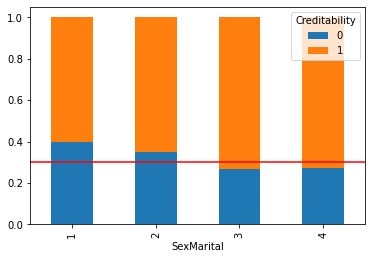

In [169]:
table = pd.crosstab(credit['SexMarital'], credit['Creditability'], normalize='index')

table.plot.bar(stacked=True)
plt.axhline(1-credit['Creditability'].mean(), color = 'r')
plt.show()

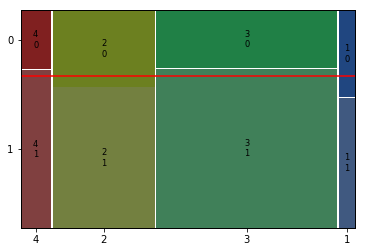

In [170]:
from statsmodels.graphics.mosaicplot import mosaic

mosaic(credit, [ 'SexMarital','Creditability'])
plt.axhline(credit['Creditability'].mean(), color = 'r')
plt.show()

3) 가설검정(카이제곱검정)

In [171]:
table = pd.crosstab(credit['SexMarital'], credit['Creditability'])

result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n',result[3])

카이제곱통계량 9.60521395933605
p-value 0.02223800546926877
기대빈도
 [[ 15.   35. ]
 [ 93.  217. ]
 [164.4 383.6]
 [ 27.6  64.4]]


4) 관계 평가하기

> 성별 & 결혼상태와 신용정보는 약한 관계가 있을 것이다.

5) 추가 분석하기

#### ④ CurrentAddress --> Creditability

1) 교차표(pd.crosstab())

In [172]:
pd.crosstab(credit['CurrentAddress'], credit['Creditability'])

Creditability,0,1
CurrentAddress,,
1,36,94
2,97,211
3,43,106
4,124,289


2) 시각화( Stacked Bar, Mosaic)

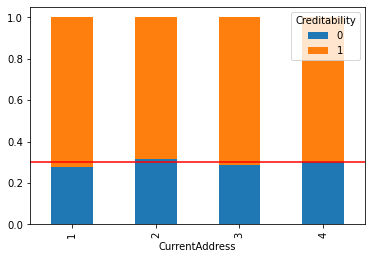

In [173]:
table = pd.crosstab(credit['CurrentAddress'], credit['Creditability'], normalize='index')

table.plot.bar(stacked=True)
plt.axhline(1-credit['Creditability'].mean(), color = 'r')
plt.show()

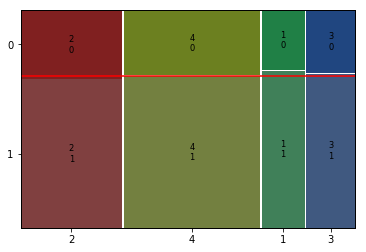

In [174]:
from statsmodels.graphics.mosaicplot import mosaic

mosaic(credit, [ 'CurrentAddress','Creditability'])
plt.axhline(credit['Creditability'].mean(), color = 'r')
plt.show()

3) 가설검정(카이제곱검정)

In [175]:
table = pd.crosstab(credit['CurrentAddress'], credit['Creditability'])

result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n',result[3])

카이제곱통계량 0.7492964483880512
p-value 0.8615521320413175
기대빈도
 [[ 39.   91. ]
 [ 92.4 215.6]
 [ 44.7 104.3]
 [123.9 289.1]]


4) 관계 평가하기

> 사는주소와 신용정보는 관계가 없다.

5) 추가 분석하기

### (3) 관계 정리하기

① 강한관계

In [ ]:
나이/ 대출의 양

② 중간관계

In [ ]:
성별, 결혼정보 / 직업 근무기간

③ 관계없음

In [ ]:
사는 주소